# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# loading dataset

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Explore Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**About the dataset:**
1. **Identifiers**

  *   **id**: A unique identification number for each sample.
  *   **diagnosis**: The target variable indicating whether the tumor is benign (B) or malignant (M).

<br>

2. **Mean Feature Values (Basic Cell Characteristics)**
These features represent the mean (average) values calculated for each image.

  *   **radius_mean**: Mean radius (average distance from center to points on the perimeter).
  *   **texture_mean**: Mean texture (standard deviation of gray-scale values).
  *   **perimeter_mean**: Mean perimeter (total length of the outer boundary).
  *   **area_mean**: Mean area of the cell nucleus.
  *   **smoothness_mean**: Local variation in radius lengths.
  *   **compactness_mean**: Perimeter² / Area (describes how compact the nucleus is).
  *   **concavity_mean**: Severity of concave portions in the contour.
  *   **concave points_mean**: Number of concave portions in the contour.
  *   **symmetry_mean**: Symmetry of the nucleus shape.
  *   **fractal_dimension_mean**: Fractal dimension (related to complexity of the shape).

<br>

3. **Standard Error (SE) of Each Feature**
These columns represent the standard error of each feature, indicating the variability within the tumor sample.


<br>

4. **Worst (Maximum) Feature Values**
These columns represent the worst (maximum) values for each feature in a single cell nucleus.




In [6]:
df['id'].nunique()

569

Removing columns: id, unnamed 32 because they're of no use for classification

In [7]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

Mapping malignant to 1 and benign to 0

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


Checking for duplicate rows

In [11]:
df.duplicated().sum()

0

No duplicate rows are present in the dataset

# EDA

Settig sns palette

In [12]:
sns.set(style="whitegrid", palette='coolwarm')

Count plot of our label - diagnosis

Text(0.5, 1.0, 'Countplot of diagnosis')

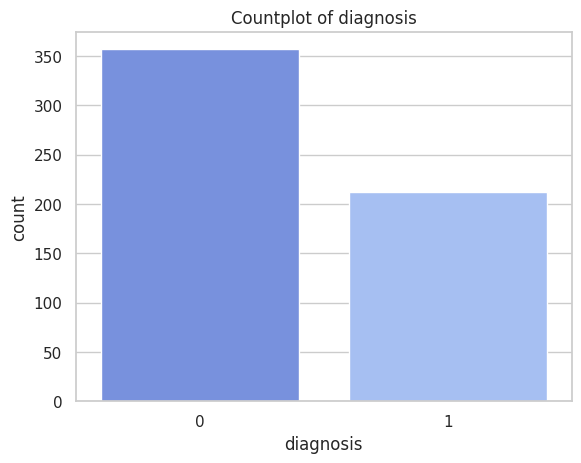

In [13]:

sns.countplot(data=df, x='diagnosis', hue = 'diagnosis', legend=False)
plt.title('Countplot of diagnosis')

There is class imbalance that we need to address

Benign - 67%

Malignant - 33%

In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
mean_columns = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

se_columns = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

worst_columns = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


In [16]:
# histograms for all the plots
def plot_hist(cols):

  plt.figure(figsize=(20, 15))

  for i, col in enumerate(cols):
      plt.subplot(8, 4, i+1)
      sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
      plt.title(f'Histogram and Density Plot of {col}')
      plt.tight_layout()

  plt.show()

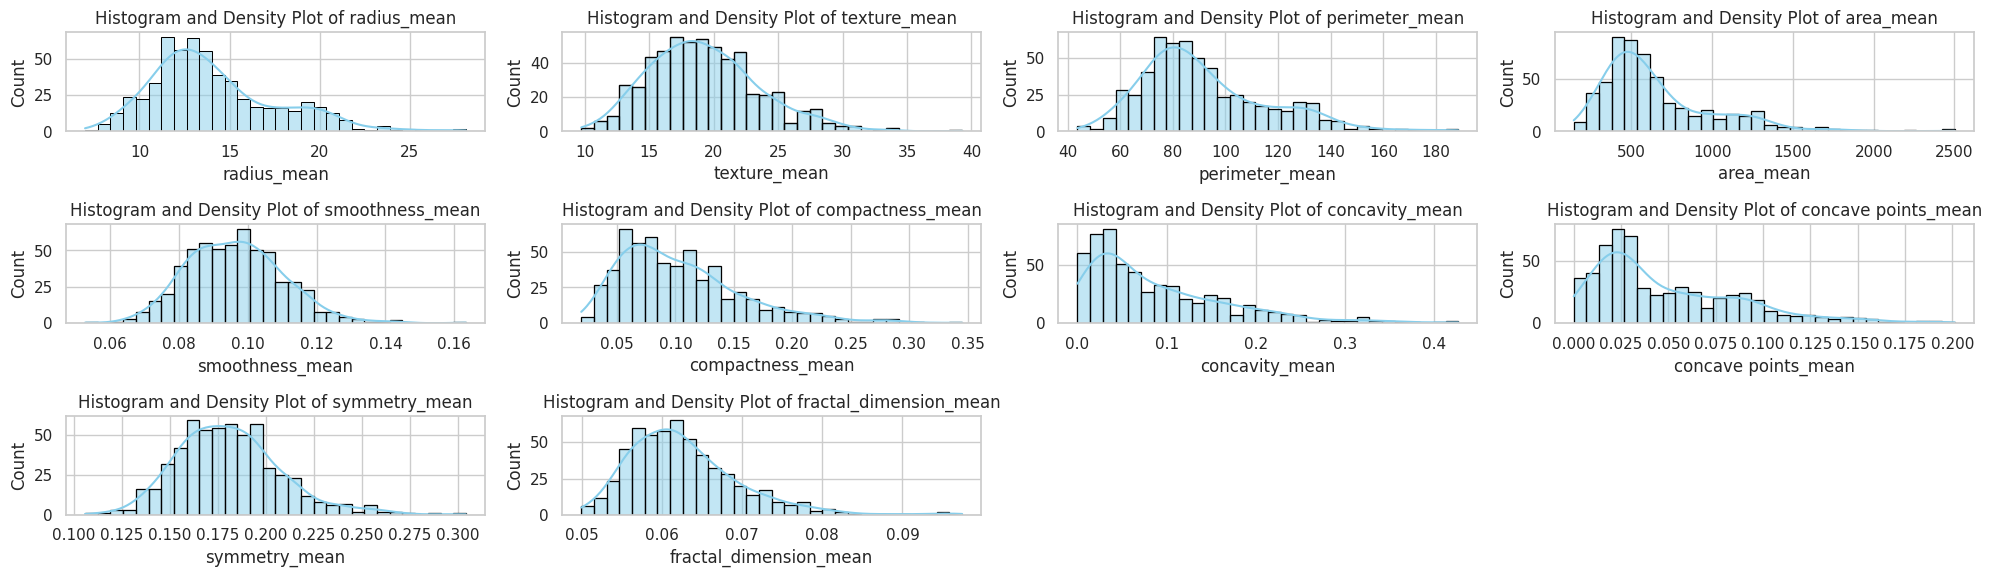

In [17]:
plot_hist(mean_columns)

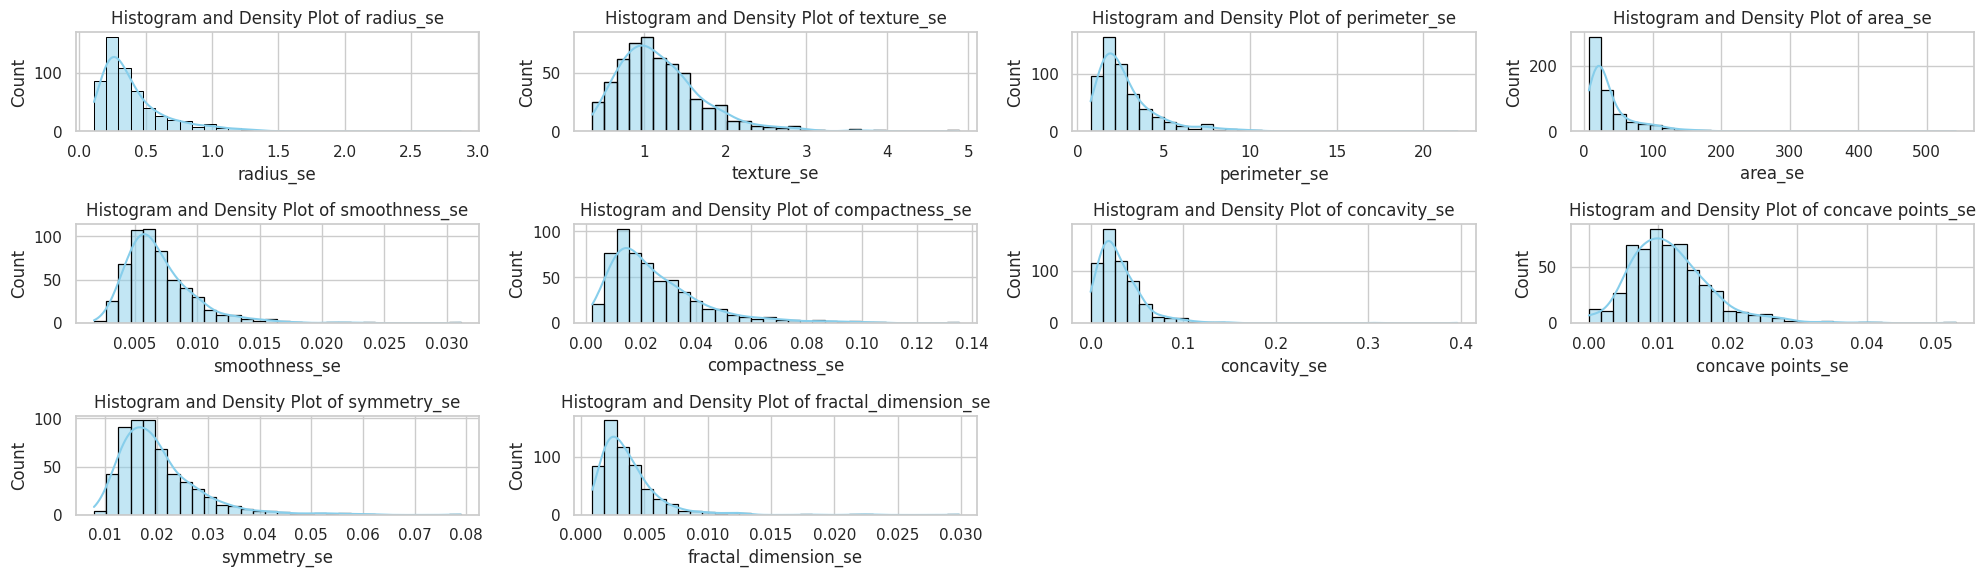

In [18]:
plot_hist(se_columns)

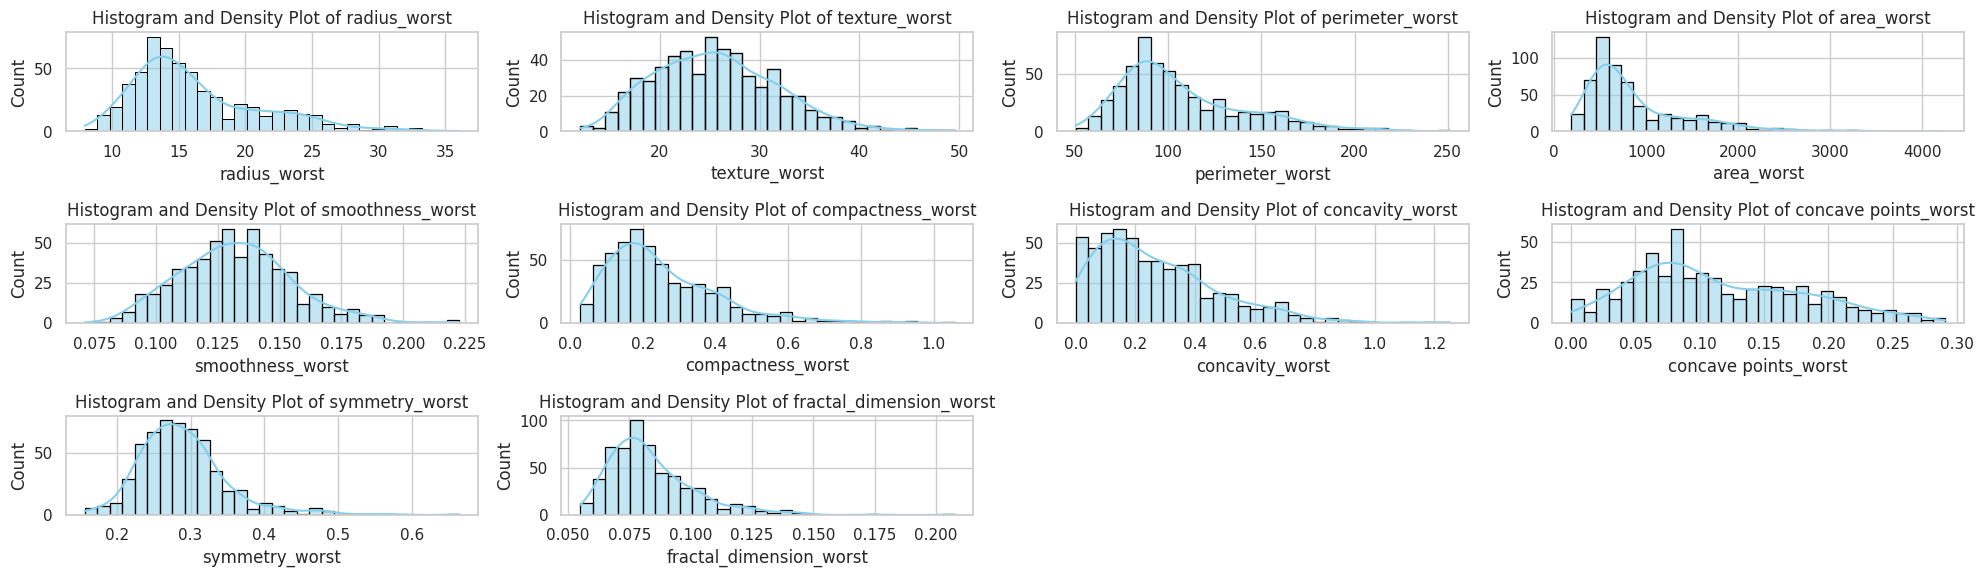

In [19]:
plot_hist(worst_columns)

Insights from the above graphs:



*   Distribution
*   Skewness
*   Outliers
*   Variance or Spread





In [20]:
def display_kde_plot(cols):
  plt.figure(figsize=(20, 15))

  for i, col in enumerate(cols):
      plt.subplot(8, 4, i+1)
      sns.kdeplot(data=df, x=col, hue='diagnosis', fill=True, common_norm=False, palette='coolwarm')
      plt.title(f'KDE Plot of {col} by Diagnosis')
      plt.tight_layout()

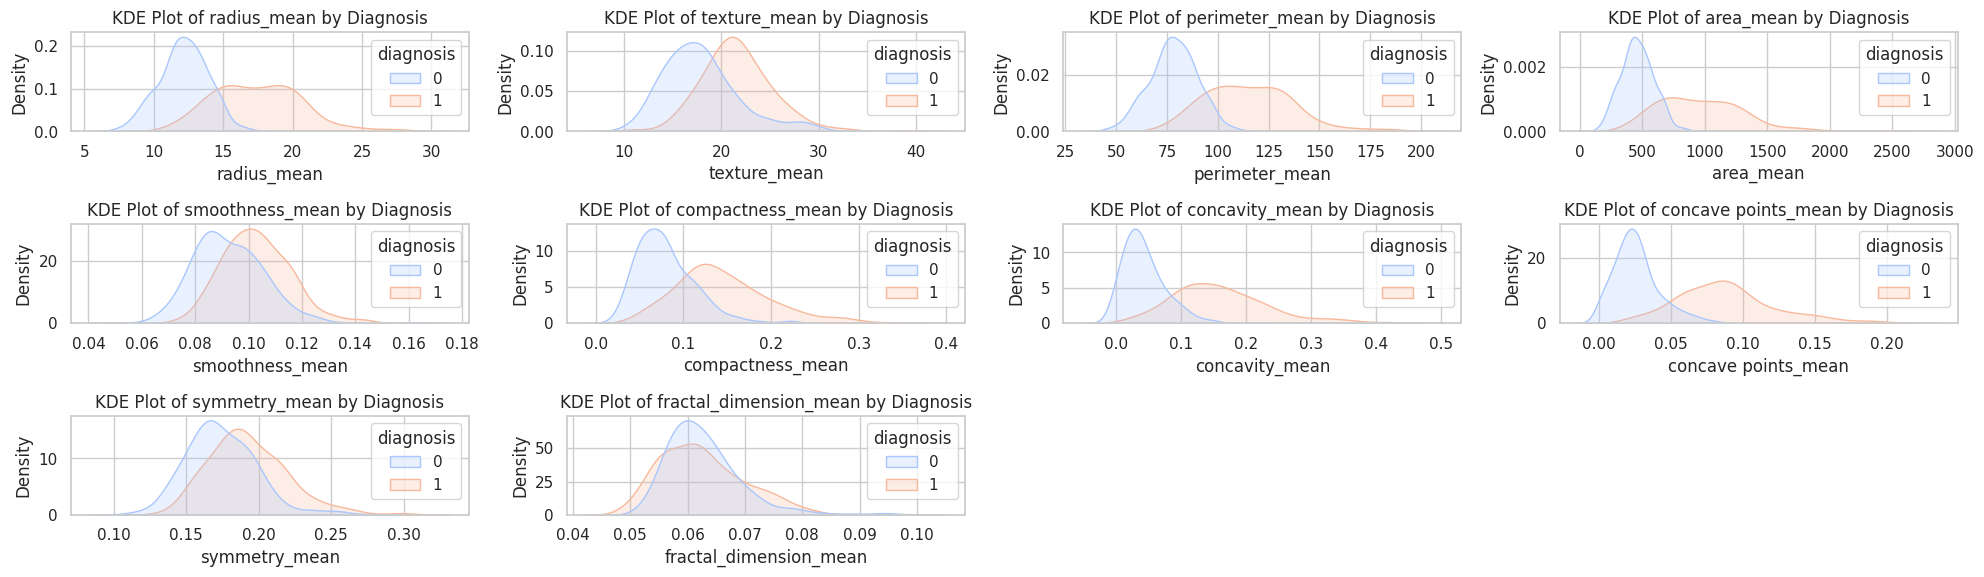

In [21]:
display_kde_plot(mean_columns)

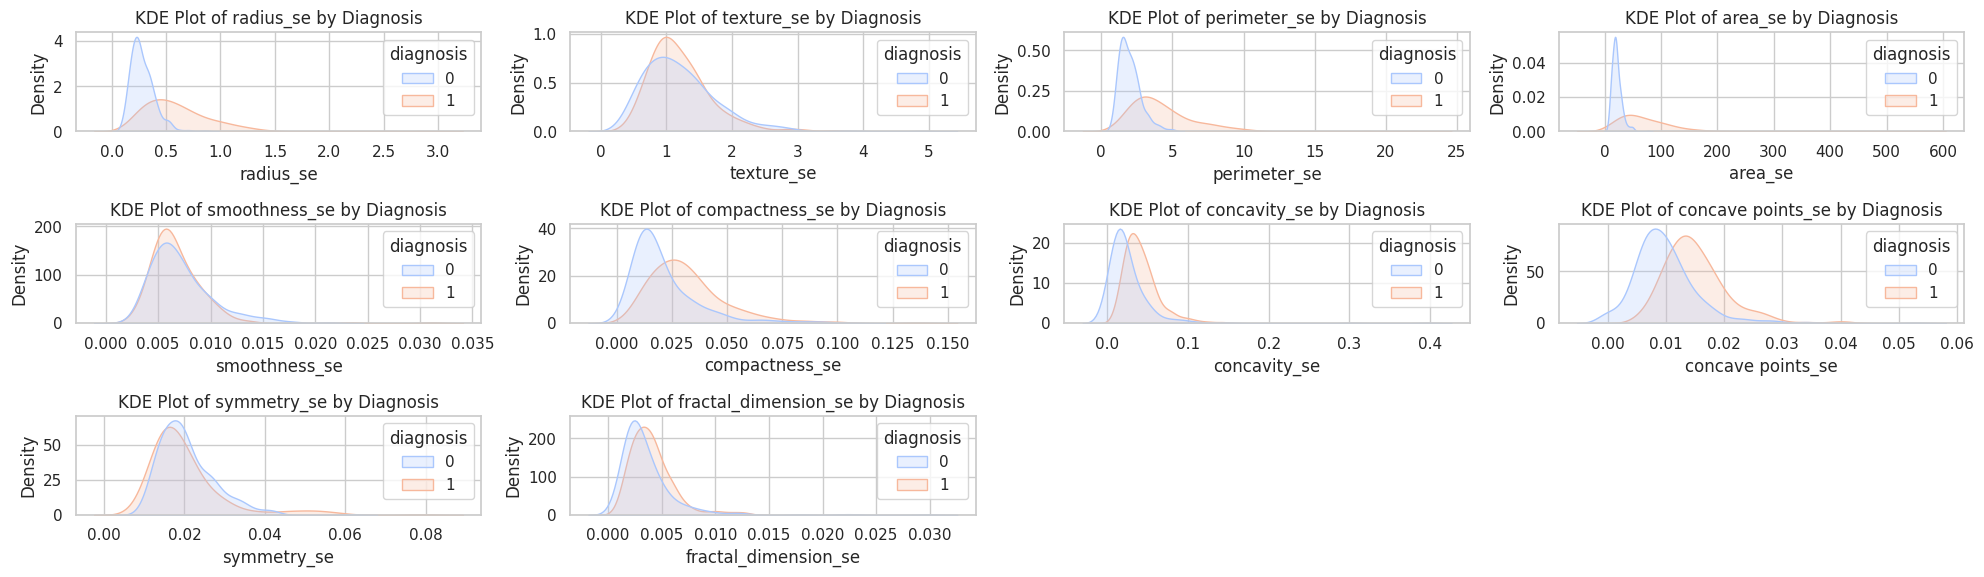

In [22]:
display_kde_plot(se_columns)

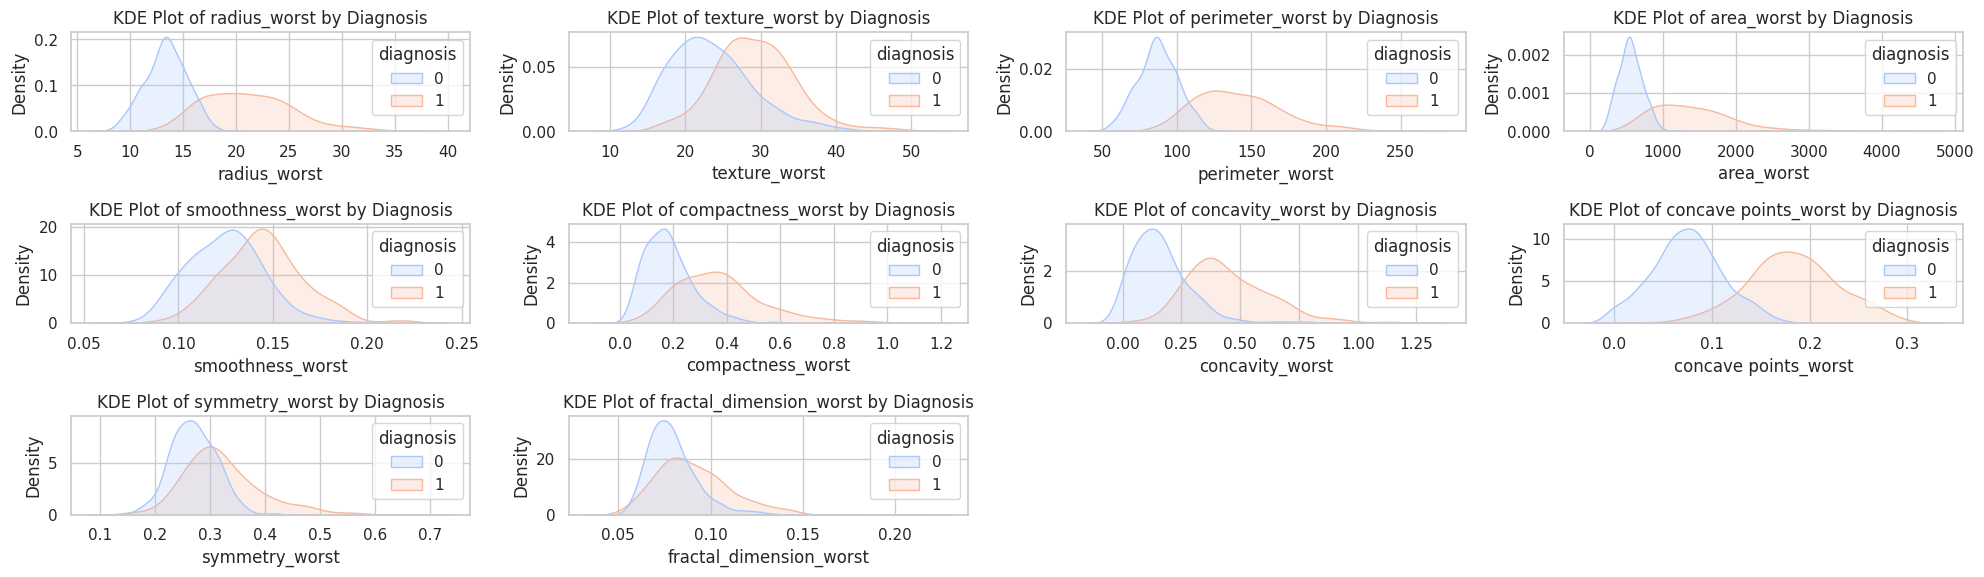

In [23]:
display_kde_plot(worst_columns)

* If the distributions for the two categories are well-separated, it indicates that this feature is a good discriminator for predicting whether a tumor is malignant or benign.

* If the distributions overlap significantly, it suggests that the feature is less effective at distinguishing between the two categories.

## correlation check

In [24]:
# features correlated to target variable
correlation_with_target = df.corr(numeric_only=True)['diagnosis'].abs()
correlation_with_target = correlation_with_target.sort_values(ascending=False)[1:]

# print('All features:')
print(correlation_with_target)
print(len(correlation_with_target))

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0.067016
fractal_dimension_mean     0

In [25]:
# Create a bar plot
def bar_plot_corr_analysis(x):
  plt.figure(figsize=(10, 10))
  sns.barplot(x=x, y=x.index, orient="h", hue=x, legend = False, palette='coolwarm')
  plt.xlabel('Absolute Correlation with "diagnosis"')
  plt.title('Features Correlation with "diagnosis"')
  plt.show()
  return

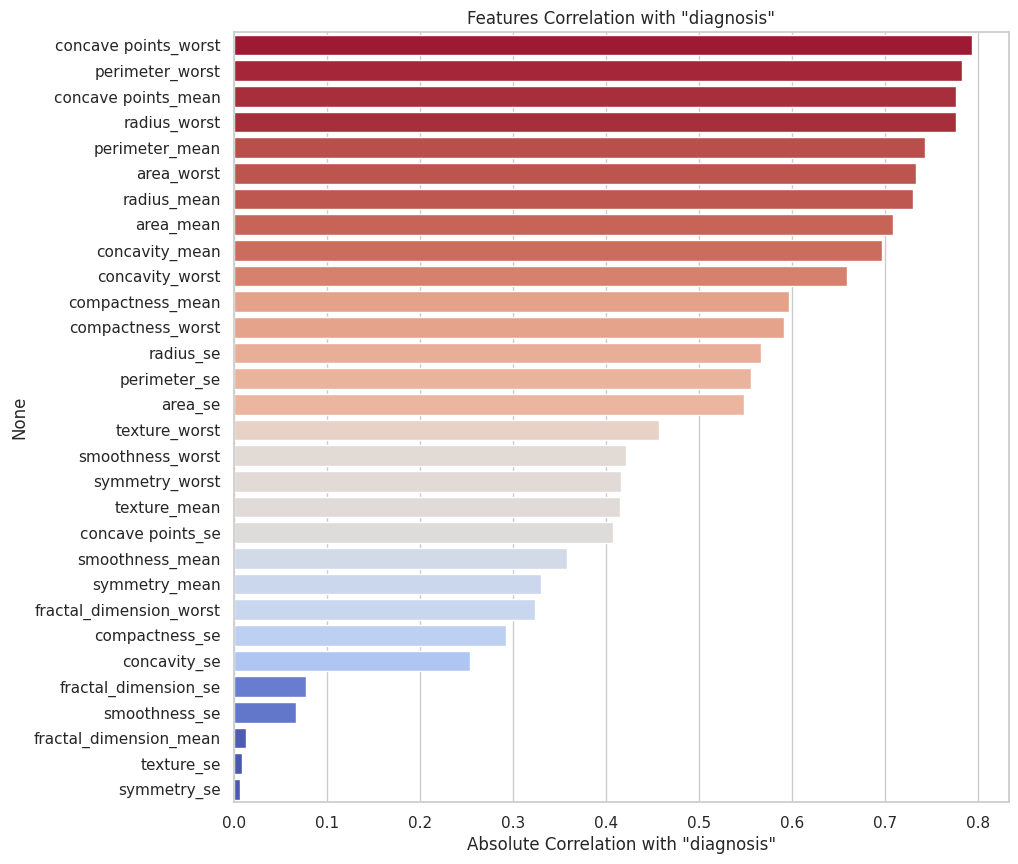

In [26]:
bar_plot_corr_analysis(correlation_with_target)

In [27]:
correlation_matrix = df.corr(numeric_only=True)

# Compute the correlation matrix
def corr_matrix(correlation_matrix):
  # print(correlation_matrix)

  plt.figure(figsize=(50,50))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title("Correlation Heatmap")
  plt.show()

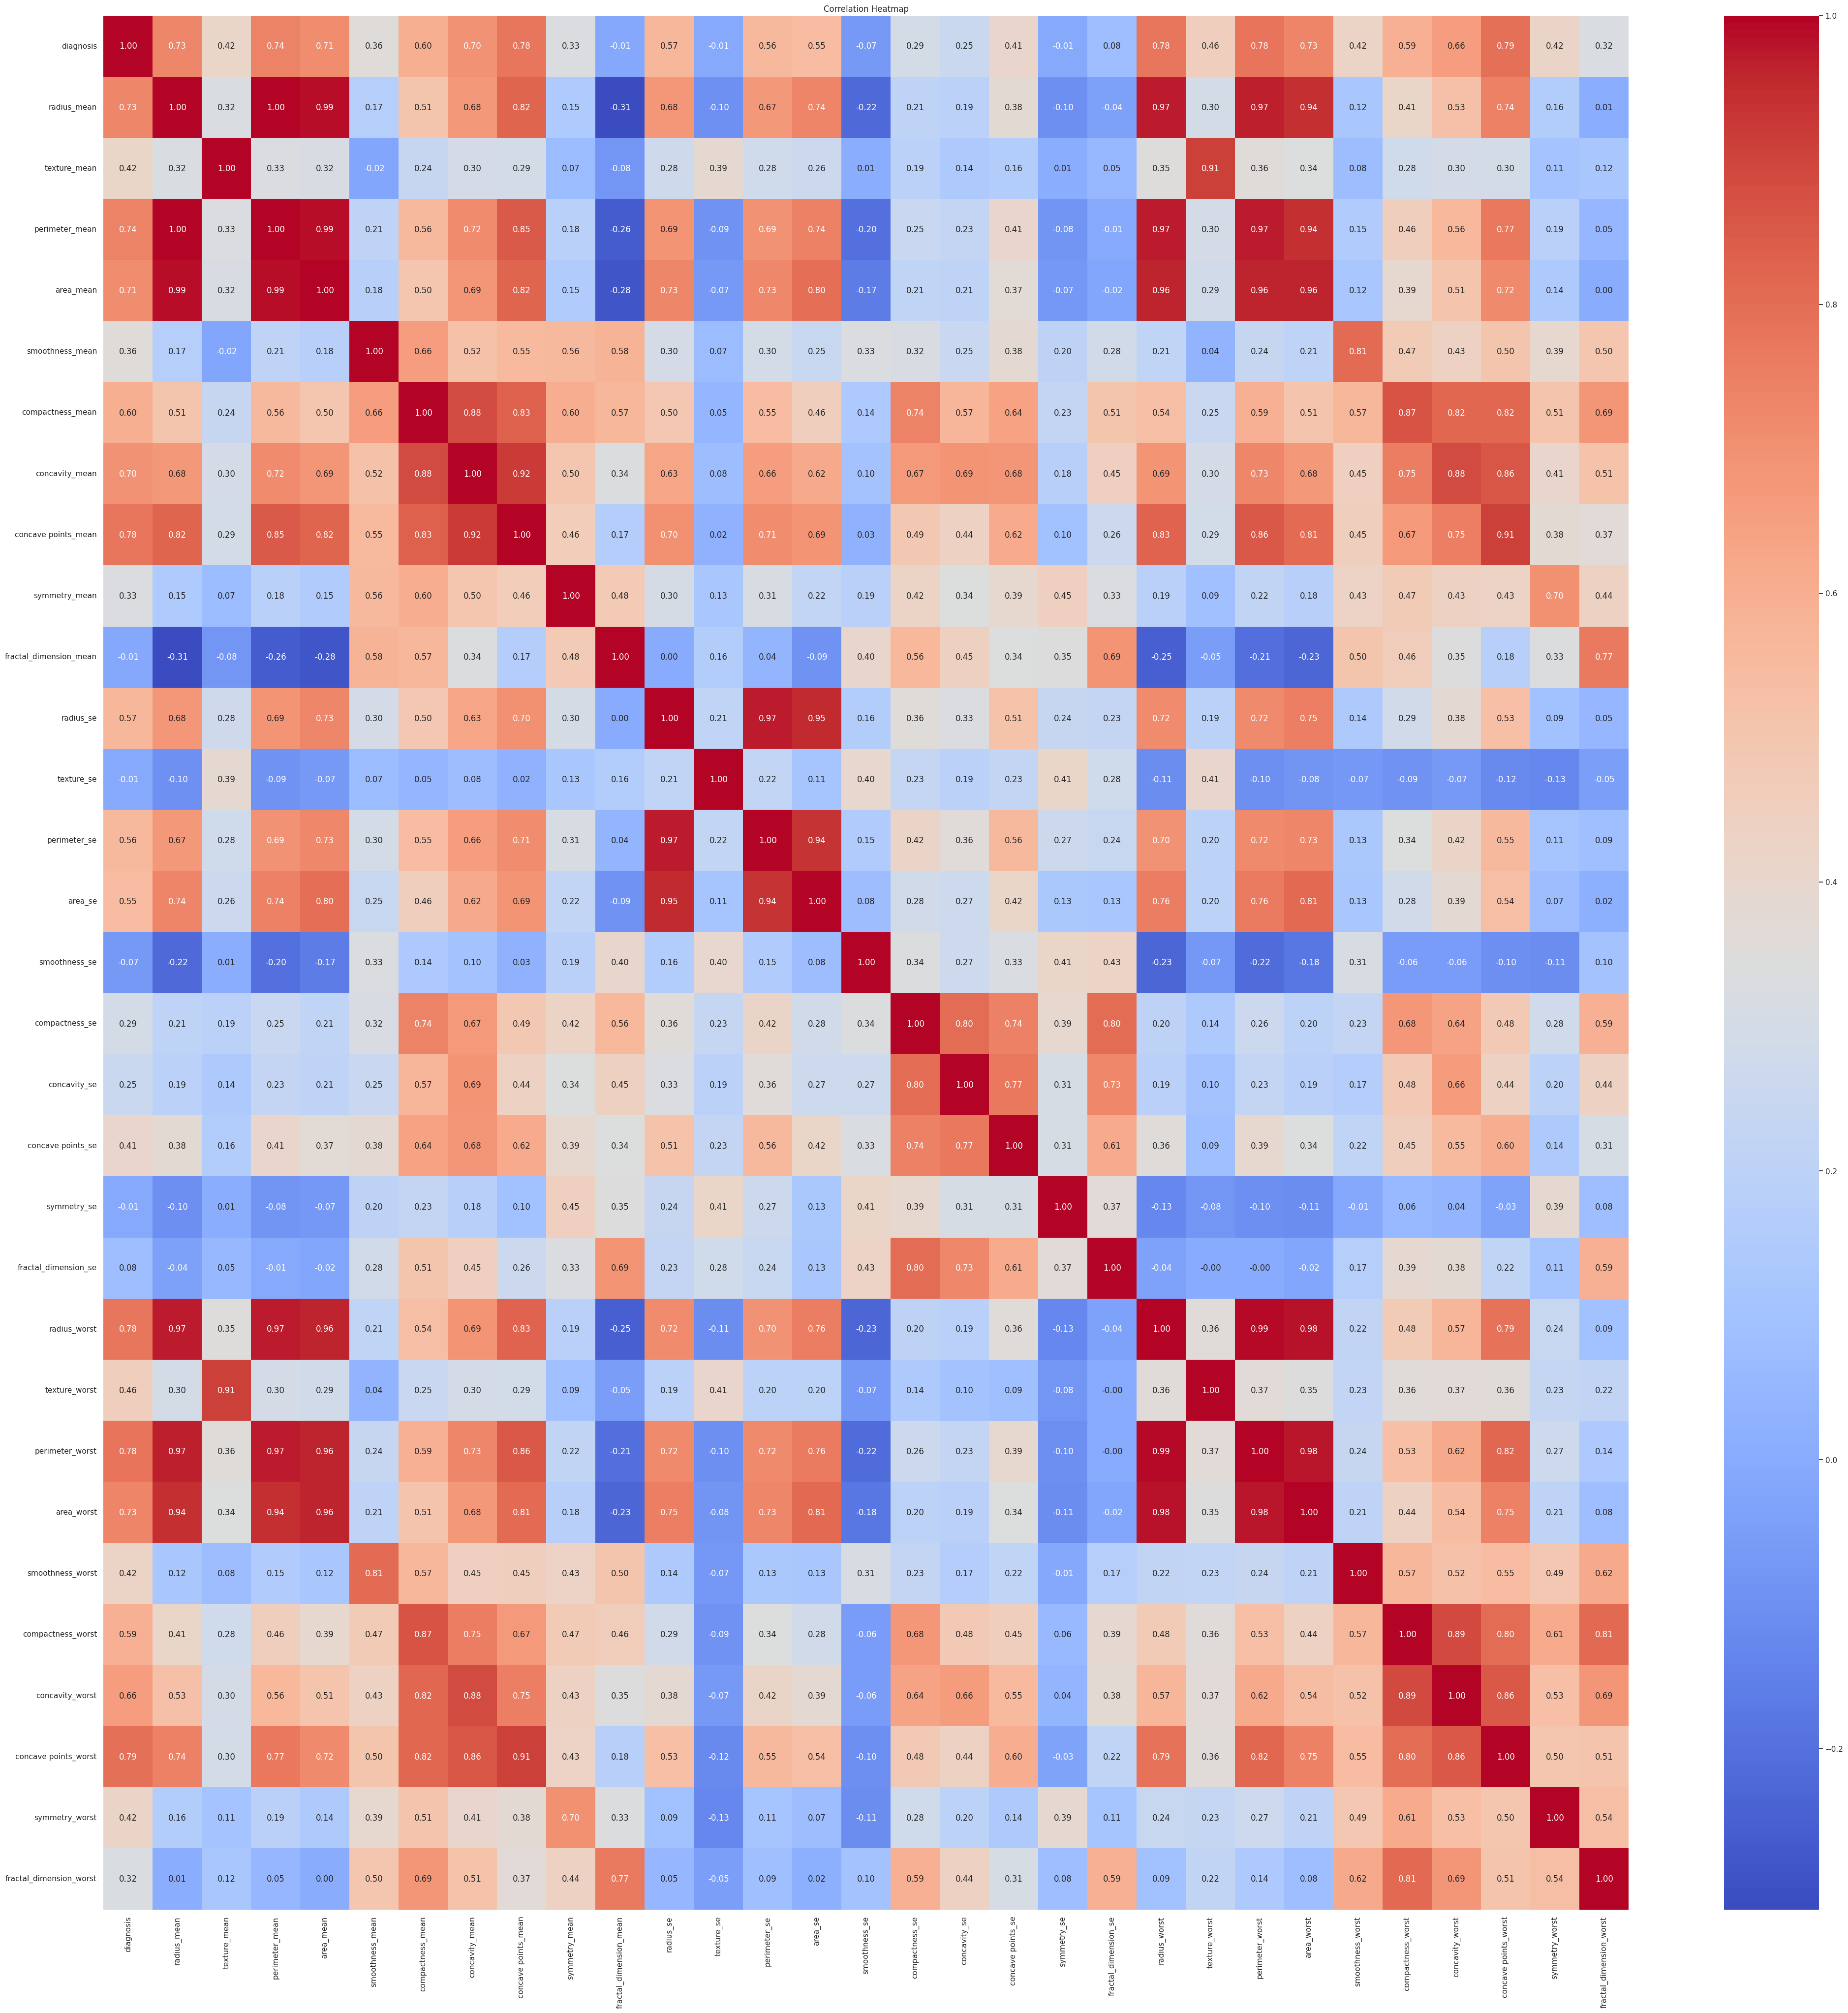

In [28]:
corr_matrix(correlation_matrix)

In [29]:
correlation_with_features = []

# defining a threshold
threshold = 0.87

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlation_with_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Sorting the list of high correlations by the correlation coefficient (third element of the tuple)
correlation_with_features.sort(key=lambda x: abs(x[2]), reverse=True)


for col1, col2, corr in correlation_with_features:
    print(col1.ljust(30,' ') + 'and\t' + col2.ljust(30,' ') + f':{corr:.2f}')

radius_mean                   and	perimeter_mean                :1.00
radius_worst                  and	perimeter_worst               :0.99
radius_mean                   and	area_mean                     :0.99
perimeter_mean                and	area_mean                     :0.99
radius_worst                  and	area_worst                    :0.98
perimeter_worst               and	area_worst                    :0.98
radius_se                     and	perimeter_se                  :0.97
perimeter_mean                and	perimeter_worst               :0.97
radius_mean                   and	radius_worst                  :0.97
perimeter_mean                and	radius_worst                  :0.97
radius_mean                   and	perimeter_worst               :0.97
area_mean                     and	radius_worst                  :0.96
area_mean                     and	area_worst                    :0.96
area_mean                     and	perimeter_worst               :0.96
radius_se           

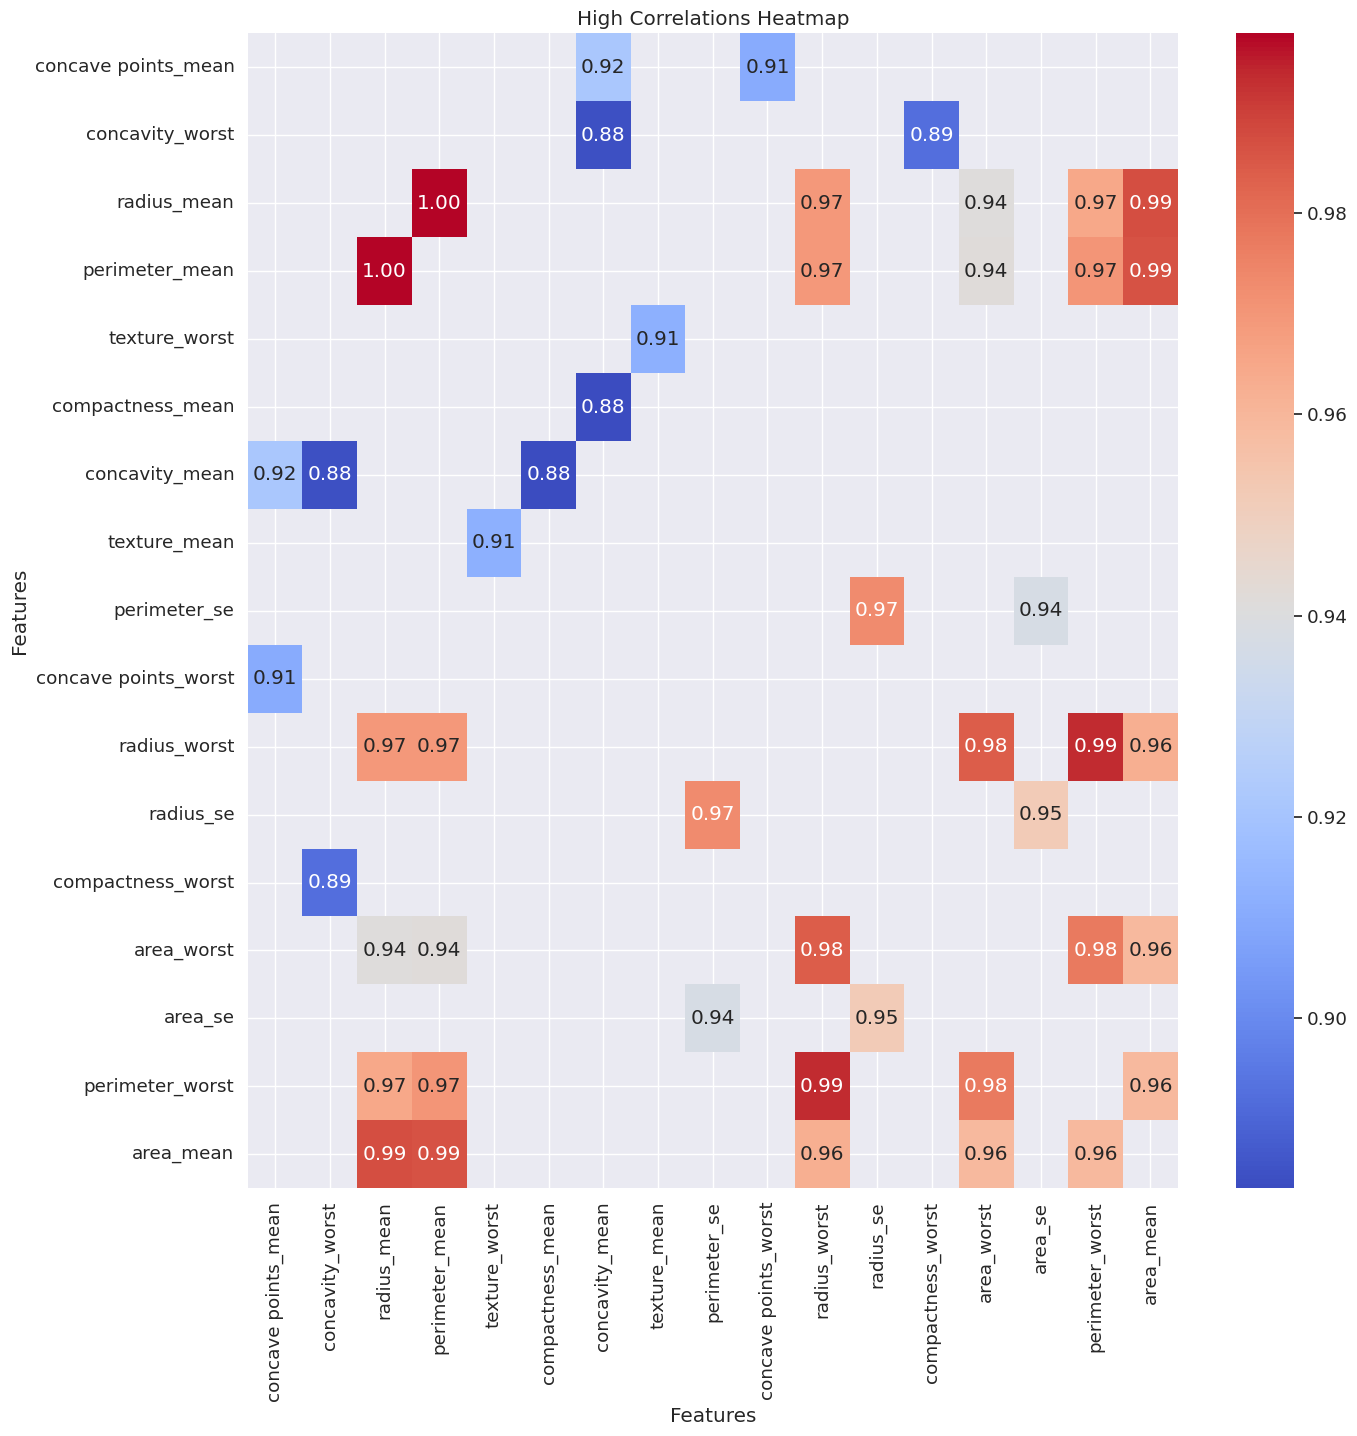

In [30]:
# visualising high correlation pairs

# Extracting the unique list of features with high correlations
features_with_high_correlations = set()
for col1, col2, _ in correlation_with_features:
    features_with_high_correlations.add(col1)
    features_with_high_correlations.add(col2)

# Creating a DataFrame with the high correlations
high_corr_df = pd.DataFrame(columns=list(features_with_high_correlations), index=list(features_with_high_correlations))

# Populating the DataFrame with correlation values
for col1, col2, corr in correlation_with_features:
    high_corr_df.at[col1, col2] = corr
    high_corr_df.at[col2, col1] = corr

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
sns.heatmap(high_corr_df.astype(float), cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('High Correlations Heatmap')
plt.show()

In [31]:
# deciding which features to remove among these highly correlated pairs
to_remove = []

# we will remove 1 feature having relatively less correlation with the target variable from each pair
for col1, col2, _ in correlation_with_features:
  if col1 not in to_remove and col2 not in to_remove:
    if correlation_with_target[col1]> correlation_with_target[col2]:
      to_remove += [col2]
    else:
      to_remove += [col1]


In [32]:
to_remove

['radius_mean',
 'radius_worst',
 'area_mean',
 'area_worst',
 'perimeter_se',
 'perimeter_mean',
 'area_se',
 'concavity_mean',
 'texture_mean',
 'concave points_mean',
 'compactness_worst']

In [33]:
correlation_with_target[to_remove]

,diagnosis
radius_mean,0.730029
radius_worst,0.776454
area_mean,0.708984
area_worst,0.733825
perimeter_se,0.556141
perimeter_mean,0.742636
area_se,0.548236
concavity_mean,0.696360
texture_mean,0.415185
concave points_mean,0.776614


In [34]:
# defining box plot func
def box_plot(feature):
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot for {feature}', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.show()
    print()

In [35]:
df.drop(to_remove, axis=1, inplace=True)

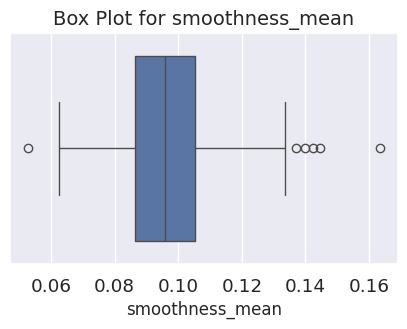

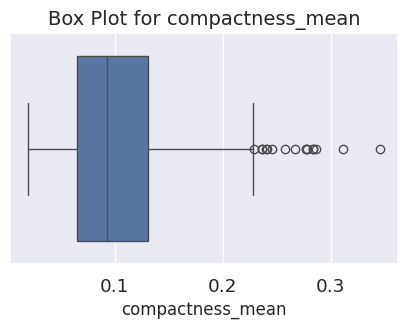

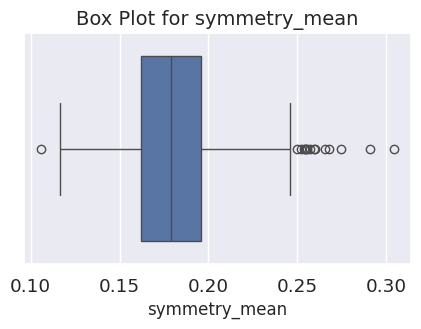

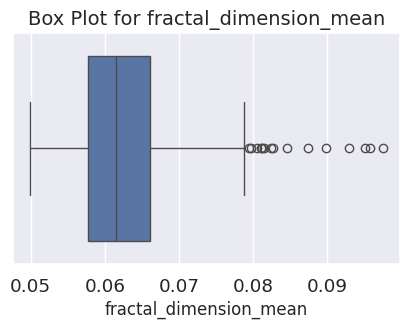

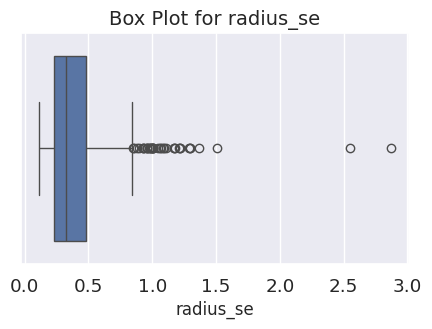

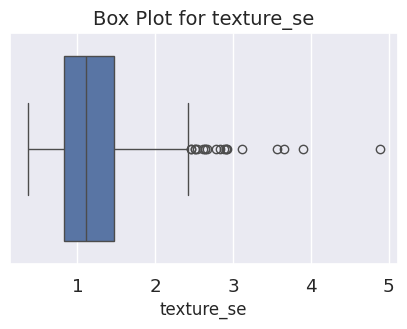

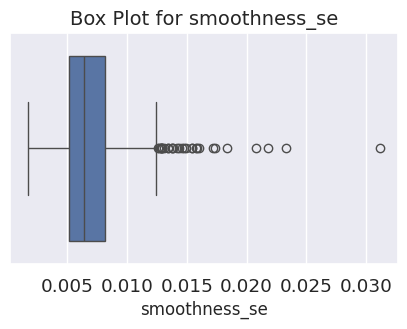

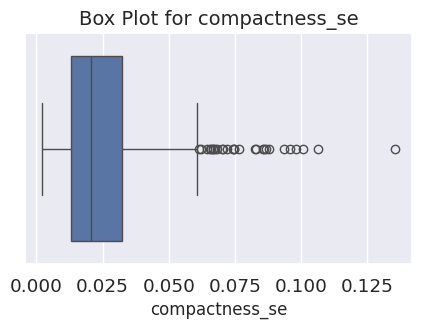

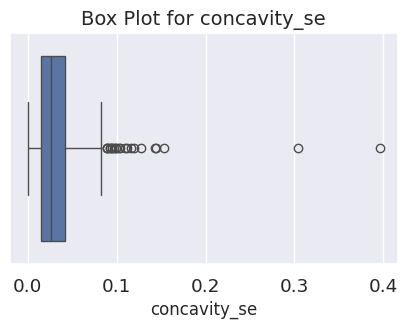

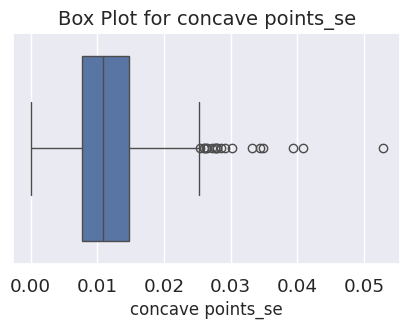

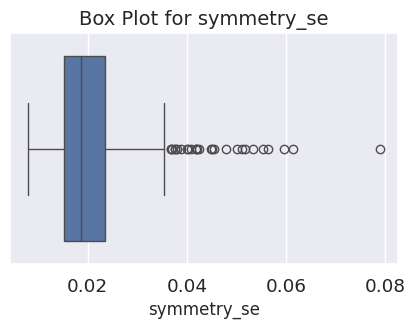

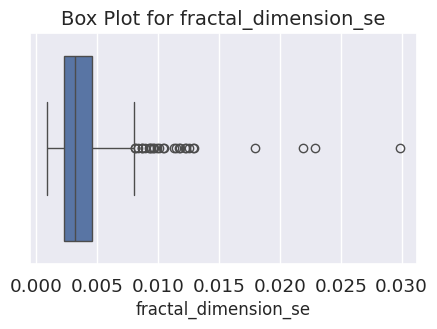

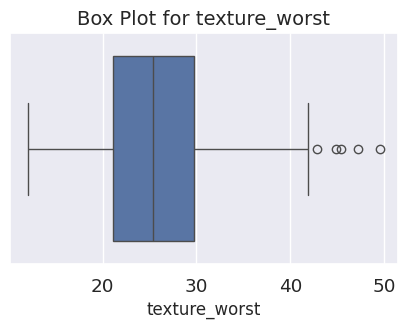

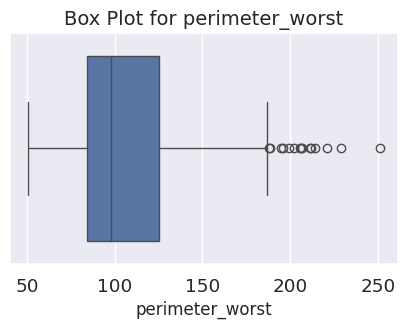

In [36]:
for col in df.columns[1:15]:
  box_plot(col)

Some features have a lot of outliers

# Data transformation

First we will split the data into train and test sets

In [37]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

resampling class

In [39]:
# class distribution before SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# class distribution after SMOTE
print("\nClass distribution after SMOTE:", y_train_smote.value_counts())

Class distribution before SMOTE: diagnosis
0    286
1    169
Name: count, dtype: int64

Class distribution after SMOTE: diagnosis
0    286
1    286
Name: count, dtype: int64


since the range varies a lot, there is a need of scaling the features

In [40]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

In [41]:
x_train_scaled.shape

(572, 19)

In [42]:
type(x_train_scaled)

numpy.ndarray

# Model creation

## Logistic Regression model

In [43]:
def print_metrics(accuracy, cm, class_report, train, test):
  print(f"Model Accuracy: {accuracy:.4f}")
  print("\nConfusion Matrix:")
  print(cm)
  print("\nClassification Report:")
  print(class_report)
  print(f"Train Accuracy: {train:.4f}")
  print(f"Test Accuracy: {test:.4f}")

In [44]:
def display_cm(cm):
  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

**Precision:**
Measures the proportion of correctly identified positive cases among all predicted positive cases.

**Recall:**
Measures the proportion of correctly identified positive cases among all actual positive cases.

In [45]:
def roc_auc_curve(model):
  y_pred_proba = model.predict_proba(x_test_scaled)[:,1]

  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(6,5))
  plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
  plt.plot([0,1], [0,1], linestyle='--', color='gray')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC-AUC Curve")
  plt.legend(loc="lower right")
  plt.show()

  print(f"ROC-AUC Score: {roc_auc:.4f}")

In [46]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train_scaled, y_train_smote)

y_pred = lr_model.predict(x_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred)
lr_cm = confusion_matrix(y_test, y_pred)
lr_class_report = classification_report(y_test, y_pred)
lr_train_accuracy = lr_model.score(x_train_scaled, y_train_smote)
lr_test_accuracy = lr_model.score(x_test_scaled, y_test)


In [47]:
print_metrics(lr_accuracy, lr_cm, lr_class_report, lr_train_accuracy, lr_test_accuracy)

Model Accuracy: 0.9649

Confusion Matrix:
[[69  2]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Train Accuracy: 0.9615
Test Accuracy: 0.9649


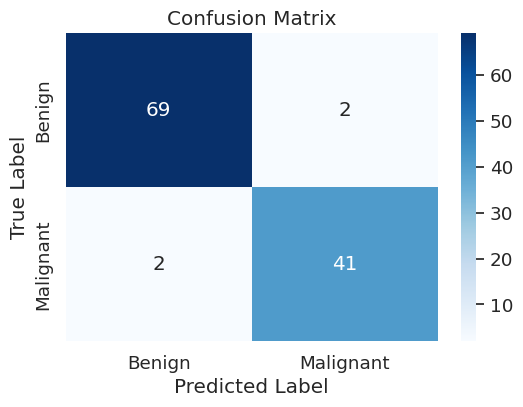

In [48]:
display_cm(lr_cm)

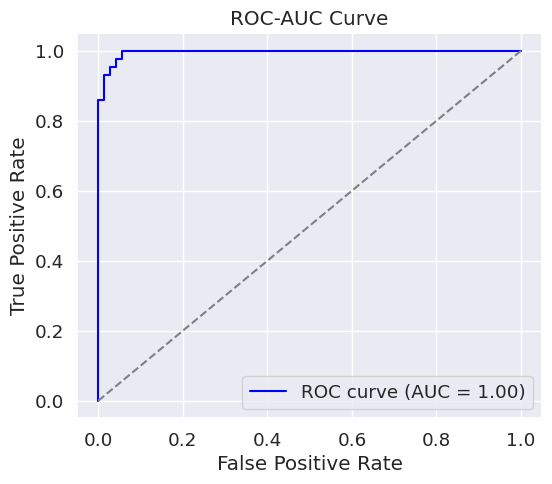

ROC-AUC Score: 0.9961


In [49]:
roc_auc_curve(lr_model)

performing cross validation

In [50]:
cv_scores = cross_val_score(lr_model, x_train_scaled, y_train_smote, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {lr_test_accuracy:.4f}")

Cross-Validation Scores: [0.93043478 0.94782609 0.93859649 0.97368421 0.98245614]
Mean CV Accuracy: 0.9546
Test Accuracy: 0.9649


## Random forest model

In [51]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(x_train_scaled, y_train_smote)

y_pred_rf = rf_model.predict(x_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)
rf_train_accuracy = rf_model.score(x_train_scaled, y_train_smote)
rf_test_accuracy = rf_model.score(x_test_scaled, y_test)

In [52]:
print_metrics(rf_accuracy, rf_cm, rf_class_report, rf_train_accuracy, rf_test_accuracy)

Model Accuracy: 0.9561

Confusion Matrix:
[[68  3]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Train Accuracy: 1.0000
Test Accuracy: 0.9561


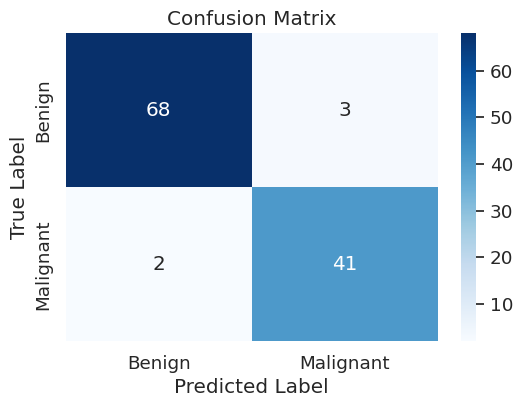

In [53]:
display_cm(rf_cm)

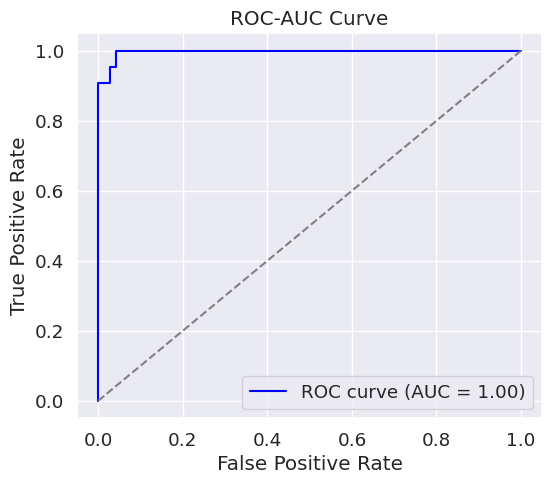

ROC-AUC Score: 0.9967


In [54]:
roc_auc_curve(rf_model)

In [55]:
cv_scores = cross_val_score(rf_model, x_train_scaled, y_train_smote, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")


Cross-Validation Scores: [0.93913043 0.96521739 0.93859649 1.         0.97368421]
Mean CV Accuracy: 0.9633
Test Accuracy: 0.9561


## SVM

In [56]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(x_train_scaled, y_train_smote)

y_pred_svm = svm_model.predict(x_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_class_report = classification_report(y_test, y_pred_svm)
svm_train_accuracy = svm_model.score(x_train_scaled, y_train_smote)
svm_test_accuracy = svm_model.score(x_test_scaled, y_test)

In [57]:
print_metrics(svm_accuracy, svm_cm, svm_class_report, svm_train_accuracy, svm_test_accuracy)

Model Accuracy: 0.9561

Confusion Matrix:
[[69  2]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Train Accuracy: 0.9825
Test Accuracy: 0.9561


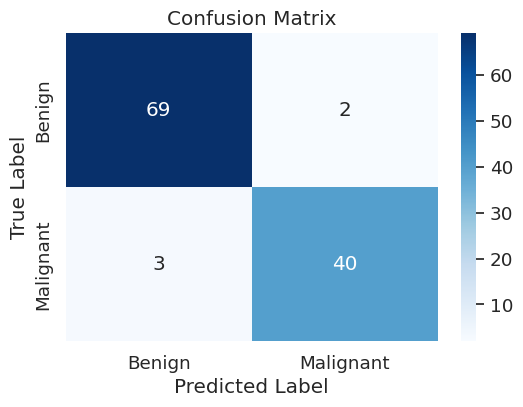

In [58]:
display_cm(svm_cm)

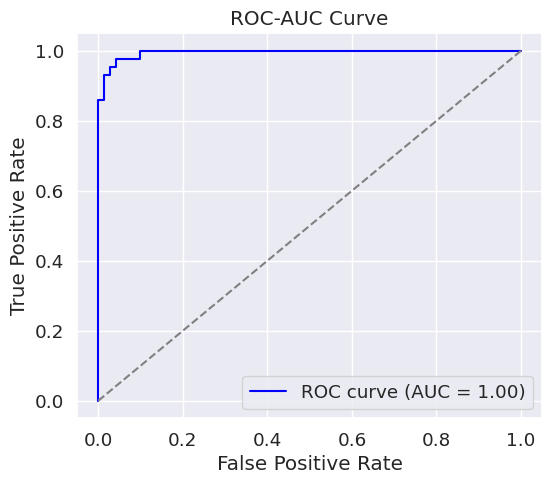

ROC-AUC Score: 0.9951


In [59]:
roc_auc_curve(svm_model)

In [60]:
cv_scores = cross_val_score(svm_model, x_train_scaled, y_train_smote, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {svm_test_accuracy:.4f}")

Cross-Validation Scores: [0.95652174 0.95652174 0.95614035 1.         0.99122807]
Mean CV Accuracy: 0.9721
Test Accuracy: 0.9561


## XGBModel

In [61]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(x_train_scaled, y_train_smote)

y_pred_xgb = xgb_model.predict(x_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
xgb_class_report = classification_report(y_test, y_pred_xgb)
xgb_train_accuracy = xgb_model.score(x_train_scaled, y_train_smote)
xgb_test_accuracy = xgb_model.score(x_test_scaled, y_test)

In [62]:
print_metrics(xgb_accuracy, xgb_cm, xgb_class_report, xgb_train_accuracy, xgb_test_accuracy)

Model Accuracy: 0.9561

Confusion Matrix:
[[68  3]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Train Accuracy: 1.0000
Test Accuracy: 0.9561


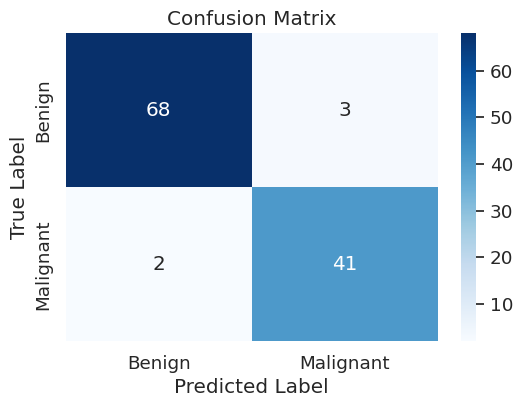

In [63]:
display_cm(xgb_cm)

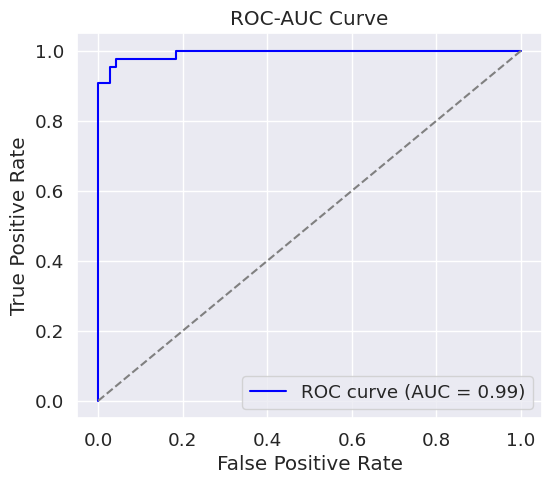

ROC-AUC Score: 0.9934


In [64]:
roc_auc_curve(xgb_model)

## KNN model

In [65]:

# Initialize and train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train_smote)

# Predictions
y_pred_knn = knn_model.predict(x_test_scaled)


knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn)
knn_train_accuracy = knn_model.score(x_train_scaled, y_train_smote)
knn_test_accuracy = knn_model.score(x_test_scaled, y_test)

In [66]:
print_metrics(knn_accuracy, knn_cm, knn_class_report, knn_train_accuracy, knn_test_accuracy)

Model Accuracy: 0.9561

Confusion Matrix:
[[67  4]
 [ 1 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Train Accuracy: 0.9878
Test Accuracy: 0.9561


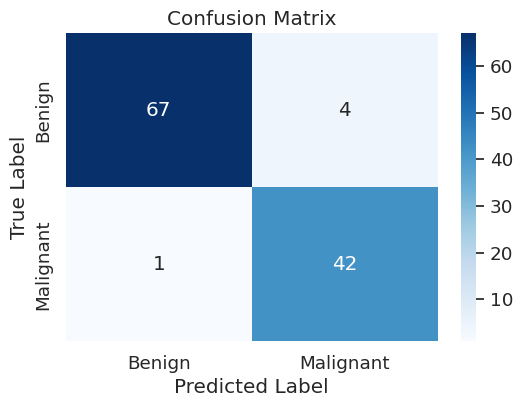

In [67]:
display_cm(knn_cm)

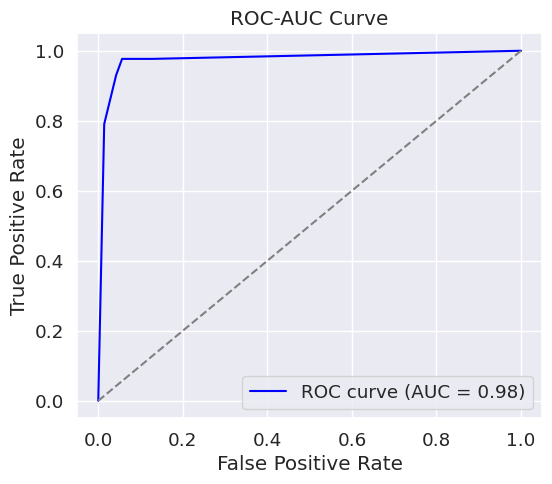

ROC-AUC Score: 0.9751


In [68]:
roc_auc_curve(knn_model)

In [69]:
cv_scores = cross_val_score(knn_model, x_train_scaled, y_train_smote, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {knn_test_accuracy:.4f}")


Cross-Validation Scores: [0.92173913 0.96521739 0.92105263 0.99122807 0.97368421]
Mean CV Accuracy: 0.9546
Test Accuracy: 0.9561


## Models Summary

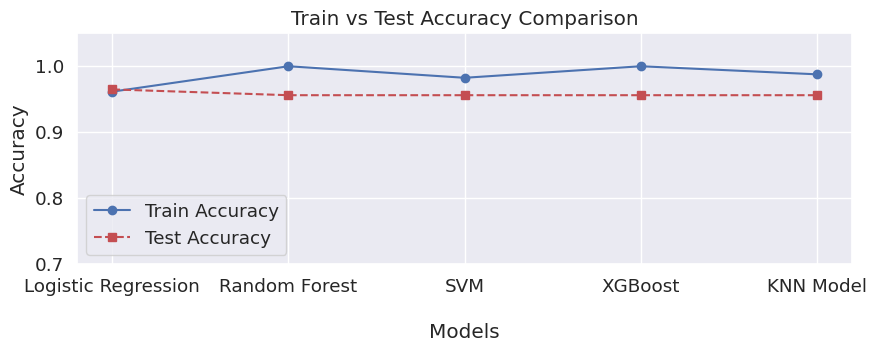

In [70]:

# Store accuracies for different models
models = ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "KNN Model"]
train_accuracies = [lr_model.score(x_train_scaled, y_train_smote),
                    rf_model.score(x_train_scaled, y_train_smote),
                     svm_model.score(x_train_scaled, y_train_smote),
                     xgb_model.score(x_train_scaled, y_train_smote),
                     knn_model.score(x_train_scaled, y_train_smote),]

test_accuracies = [lr_model.score(x_test_scaled, y_test),
                   rf_model.score(x_test_scaled, y_test),
                   svm_model.score(x_test_scaled, y_test),
                   xgb_model.score(x_test_scaled, y_test),
                   knn_model.score(x_test_scaled, y_test)]

# Plot Train vs Test Accuracy
plt.figure(figsize=(10,3))
plt.plot(models, train_accuracies, marker='o', linestyle='-', color='b', label="Train Accuracy")
plt.plot(models, test_accuracies, marker='s', linestyle='--', color='r', label="Test Accuracy")

# Customize
plt.xlabel("\nModels")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.05)  # Keep range within reasonable accuracy limits
plt.title("Train vs Test Accuracy Comparison")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [71]:
def plot_combined_roc(models, x_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-AUC Curve for All Models")
    plt.legend(loc="lower right")
    plt.show()


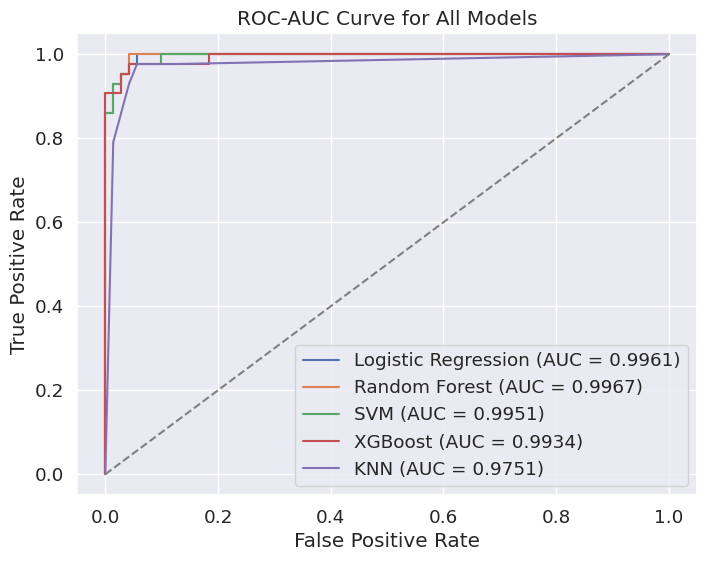

In [72]:
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "KNN": knn_model
}

plot_combined_roc(models, x_test_scaled, y_test)